# PredictLoto - prédiction de résultat du loto

## Introduction

L’objectif de ce projet est d’explorer les tirages passés du loto afin de construire des modèles prédictifs.  
Même si les tirages sont conçus pour être aléatoires, ce projet servira de terrain d’expérimentation en :
- collecte et préparation de données,
- analyse exploratoire,
- création et comparaison de modèles,

---

### Comparatif des Jeux de Tirage (FDJ)

#### Introduction

Avant de développer un modèle prédictif sur les tirages, il est important de bien comprendre les différences entre les principaux jeux proposés par la Française des Jeux (FDJ).  
Chaque jeu possède ses propres règles, probabilités et types de gains. 

#### 1. LOTO (France)

- **Règles** : choisir **5 numéros** (parmi 49) + **1 numéro chance** (parmi 10).
- **Fréquence** : 3 tirages par semaine (lundi, mercredi, samedi).
- **Jackpot minimum** : 2 millions € (augmente si pas de gagnant).
- **Particularités** :
  - Nombreuses catégories de gains (ex. 2 bons numéros).
  - Option d’un second tirage.

<hr style="width: 50%;">

#### 2. EuroMillions

- **Règles** : choisir **5 numéros** (parmi 50) + **2 étoiles** (parmi 12).
- **Fréquence** : 2 tirages par semaine (mardi et vendredi).
- **Jackpot minimum** : 17 millions €, plafond à 240 millions €.
- **Particularités** :
  - Jeu paneuropéen (plusieurs pays participants).
  - En France, tirage complémentaire *My Million* (1 gagnant à 1 M€ garanti à chaque tirage).

<hr style="width: 50%;">

#### 3. EuroDreams

- **Règles** : choisir **6 numéros** (parmi 40) + **1 numéro "Dream"** (parmi 5).
- **Fréquence** : 2 tirages par semaine (lundi et jeudi).
- **Gain principal** : **20 000 €/mois pendant 30 ans**.
- **Particularités** :
  - Jeu orienté vers la rente à vie plutôt qu’un jackpot unique.
  - Probabilités un peu meilleures que l’EuroMillions mais gains plus limités.

<hr style="width: 50%;">

#### 4. Keno Gagnant à Vie

- **Règles** : choisir jusqu’à **10 numéros** (parmi 70), puis 20 numéros sont tirés.
- **Fréquence** : 2 tirages par jour (midi et soir).
- **Gain principal** : jusqu’à **100 000 €/an à vie** ou **2 millions € cash** (selon option).
- **Particularités** :
  - Flexibilité du jeu : tu choisis combien de numéros jouer et ta mise.
  - Résultats rapides (deux fois par jour).

<hr style="width: 50%;">

#### 5. Amigo

- **Règles** : choisir **7 numéros** (parmi 28).
- **Fréquence** : tirages toutes les **5 minutes** en point de vente FDJ.
- **Gain maximum** : 20 000 €.
- **Particularités** :
  - Jeu instantané, pensé pour des parties rapides.
  - Accessible uniquement dans les points de vente FDJ (bars, tabacs, etc.).

<hr style="width: 50%;">

#### Tableau comparatif

| Jeu           | Combinaison         | Fréquence de tirage | Gain maximum              | Particularité |
|---------------|---------------------|---------------------|---------------------------|---------------|
| **LOTO**      | 5/49 + 1/10        | 3x / semaine        | ≥ 2 M€                    | Numéro chance |
| **EuroMillions** | 5/50 + 2/12     | 2x / semaine        | 17 M€ → 240 M€            | My Million FR |
| **EuroDreams** | 6/40 + 1/5        | 2x / semaine        | 20k€/mois pendant 30 ans  | Rente à vie   |
| **Keno**      | jusqu’à 10/70      | 2x / jour           | 100k€/an à vie ou 2 M€    | Jeu flexible  |
| **Amigo**     | 7/28               | toutes les 5 min    | 20 000 €                  | Ultra rapide  |

Pour la suite de ce projet, nous avons choisi de travailler sur **le LOTO**, car il représente le meilleur compromis entre complexité raisonnable, disponibilité des données et potentiel de gains significatifs.

---

## Sommaire

1. [Récupération des données](#1-récupération-des-données)

2. [Préparation & Analyse](#2-préparation--analyse)

3. [Modélisation](#3-modélisation)

4. [Évaluation](#4-évaluation)

5. [Utilisation](#5-utilisation)

6. [Conclusion](#6-conclusion)

---

## 1. Récupération des données

### Source des données LOTO 2019 → Aujourd'hui

#### Présentation du site

Nous utilisons le dataset disponible sur **OpenDataSoft**, qui répertorie tous les résultats du **LOTO français** depuis 2019 jusqu'à aujourd'hui, avec des mises à jour régulières après chaque tirage.

- **URL du dataset** : [Resultats LOTO 2019 à aujourd'hui](https://data.opendatasoft.com/explore/dataset/resultats-loto-2019-a-aujourd-hui%40agrall/information/?sort=date_de_tirage)
- **Avantages** :
  - Historique complet des tirages depuis 2019 (~936 tirages disponibles à raison de 3 tirages/semaine).
  - Données mises à jour automatiquement après chaque tirage officiel.
  - Format structuré facile à exploiter pour Python (CSV / JSON / API).

<hr style="width: 50%;">

#### Structure des données

Chaque ligne du dataset correspond à **un tirage du LOTO** et contient les colonnes suivantes :

| Colonne               | Description |
|-----------------------|------------|
| `annee_numero_de_tirage` | Identifiant unique du tirage, combinant l'année et le numéro séquentiel du tirage dans l'année. |
| `date_de_tirage`      | Date du tirage (format YYYY-MM-DD). |
| `boule_1`             | Premier numéro tiré (1 → 49). |
| `boule_2`             | Deuxième numéro tiré (1 → 49). |
| `boule_3`             | Troisième numéro tiré (1 → 49). |
| `boule_4`             | Quatrième numéro tiré (1 → 49). |
| `boule_5`             | Cinquième numéro tiré (1 → 49). |
| `numero_chance`       | Numéro chance (1 → 10). |

<hr style="width: 50%;">

#### Remarques importantes :

1. Les **boules 1 à 5** sont les numéros principaux du tirage.
2. Le **numéro chance** est tiré séparément et est nécessaire pour le jackpot maximal.
3. Chaque tirage est **daté précisément**, ce qui permet de créer des features temporelles pour la modélisation.
4. Le dataset est **prêt pour un traitement Python / Pandas**, ce qui facilitera le nettoyage, l’analyse et la création de modèles prédictifs.

***Pour des choix d'efficacité nous choisissons de ne pas traiter le numéro gagnant.***

---

## 2. Préparation & Analyse

### Chargement

Nous allons maintenant charger le dataset des résultats du LOTO (2019 → aujourd'hui) dans un **DataFrame Pandas**.

**Chargement du fichier CSV LOTO avec Pandas**

In [2]:
import pandas as pd

csv_path = "resultDataLoto.csv"

df = pd.read_csv(csv_path, sep=';', parse_dates=['date_de_tirage'])

df.head()


,annee_numero_de_tirage,date_de_tirage,boule_1,boule_2,boule_3,boule_4,boule_5,numero_chance
0,25100,2025-08-20,2,27,36,40,1,7
1,25099,2025-08-18,8,27,21,2,26,6
2,25098,2025-08-16,31,5,18,45,4,7
3,25097,2025-08-13,47,9,31,36,42,1
4,25096,2025-08-11,40,30,44,1,10,2


### vérification des données LOTO

Nous vérifions maintenant :  
1. L'intégrité des données (valeurs manquantes).  
2. Le format et le type de chaque colonne.  
3. Le nombre total de tirages disponibles pour analyse.

**Vérification de l'intégrité des données**

In [21]:
integrity_table = pd.DataFrame({
    "Valeurs manquantes": df.isnull().sum()
})

integrity_table

,Valeurs manquantes
annee_numero_de_tirage,0
date_de_tirage,0
boule_1,0
boule_2,0
boule_3,0
boule_4,0
boule_5,0
numero_chance,0


**Vérification du type de chaque colonne**

In [22]:
integrity_table = pd.DataFrame({
    "Type de colonne": df.dtypes,
})
integrity_table


,Type de colonne
annee_numero_de_tirage,int64
date_de_tirage,datetime64[ns]
boule_1,int64
boule_2,int64
boule_3,int64
boule_4,int64
boule_5,int64
numero_chance,int64


**Nombre de tirage total**

In [23]:
total_tirages = pd.DataFrame({
    "Nombre total de tirages": [len(df)]
})

total_tirages


,Nombre total de tirages
0,2641


**Suppression des colonnes non-nécessaire**

In [24]:
df = df.drop(columns=["annee_numero_de_tirage", "date_de_tirage", "numero_chance"])
df.head()

,boule_1,boule_2,boule_3,boule_4,boule_5
0,2,27,36,40,1
1,8,27,21,2,26
2,31,5,18,45,4
3,47,9,31,36,42
4,40,30,44,1,10


### Analyse exploratoire des résultats LOTO

Nous allons effectuer une **analyse exploratoire** pour mieux comprendre les tirages :
1. **Analyse unidimensionnelle** : fréquence de sortie de chaque boule principale et du numéro chance.
2. **Analyse bidimensionnelle** : relations entre les numéros, par exemple la co-occurrence des numéros dans un même tirage.

#### Analyse unidimensionnelle

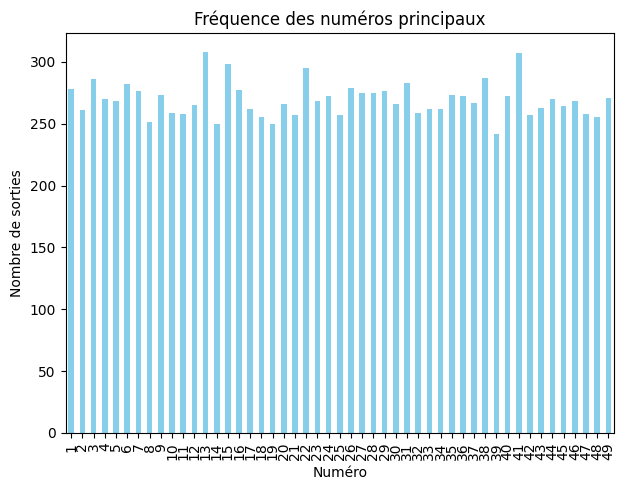

In [25]:
import matplotlib.pyplot as plt

boules = pd.concat([df['boule_1'], df['boule_2'], df['boule_3'], df['boule_4'], df['boule_5']])

freq_boules = boules.value_counts().sort_index()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
freq_boules.plot(kind='bar', color='skyblue')
plt.title("Fréquence des numéros principaux")
plt.xlabel("Numéro")
plt.ylabel("Nombre de sorties")

plt.tight_layout()
plt.show()


Explications unidimensionnelles
- Permet de visualiser la répartition de chaque numéro dans les tirages.
- Les numéros principaux et le numéro chance sont analysés séparément.
- Utile pour détecter si certains numéros sortent plus fréquemment, même si le loto est aléatoire.

#### Analyse bidimensionnelle (co-occurrence)

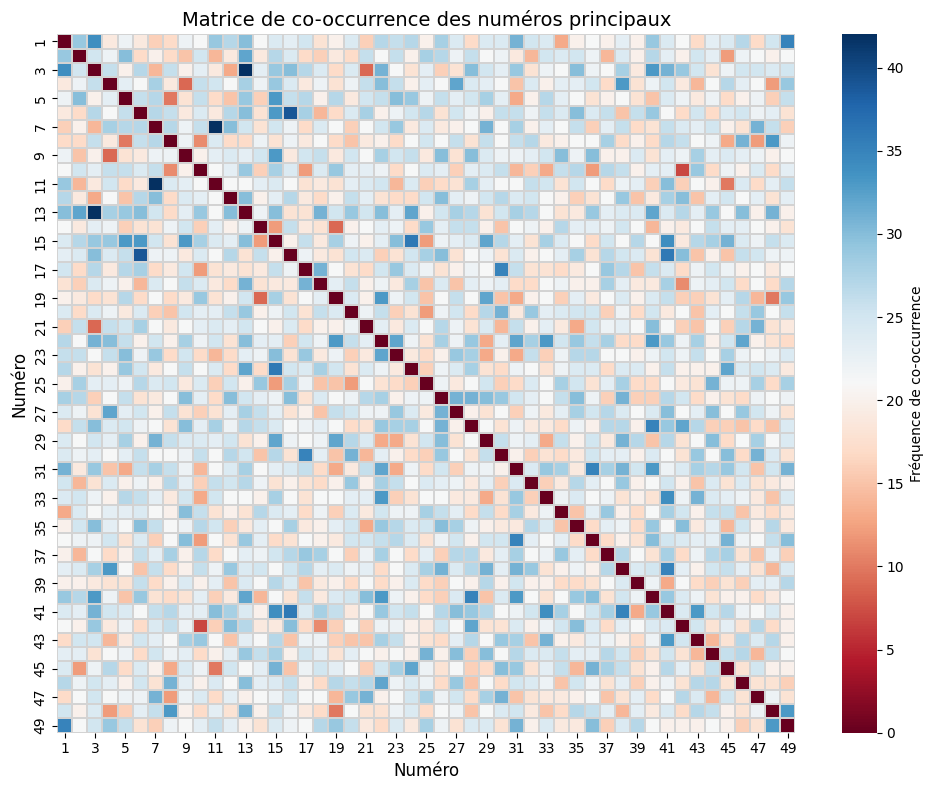

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple : df avec les tirages (remplace par ton propre DataFrame)
# df = pd.read_csv("tes_tirages.csv")

# Colonnes contenant les numéros tirés
boules_cols = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']

# Initialisation de la matrice de co-occurrence
co_occurrence = pd.DataFrame(0, index=range(1, 50), columns=range(1, 50))

# Remplissage de la matrice
for row in df[boules_cols].values:
    for i in range(len(row)):
        for j in range(i + 1, len(row)):
            co_occurrence.loc[row[i], row[j]] += 1
            co_occurrence.loc[row[j], row[i]] += 1

# Affichage de la heatmap avec dégradé rouge → bleu
plt.figure(figsize=(10, 8))
sns.heatmap(
    co_occurrence,
    cmap="RdBu",   # dégradé rouge → bleu
    linewidths=0.1,
    linecolor="lightgray",
    cbar_kws={'label': 'Fréquence de co-occurrence'}
)
plt.title("Matrice de co-occurrence des numéros principaux", fontsize=14)
plt.xlabel("Numéro", fontsize=12)
plt.ylabel("Numéro", fontsize=12)
plt.tight_layout()
plt.show()


### divisions de la data en 95/5 (entrainement et test)

In [27]:
from sklearn.model_selection import train_test_split

boules_cols = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']

df_train, df_test = train_test_split(df[boules_cols], test_size=0.05, shuffle=False)

print(f"Nombre de tirages pour l'entraînement : {len(df_train)}")
print(f"Nombre de tirages pour le test : {len(df_test)}")


Nombre de tirages pour l'entraînement : 2508
Nombre de tirages pour le test : 133


---

## 3. Modélisation

### Choix des modèles prédictifs

Le dataset LOTO couvre environ **936 tirages** (2019 → 2025), ce qui reste **relativement faible pour l'entraînement de modèles complexes**.  
En conséquence, nous privilégions des modèles simples ou peu data-hungry qui peuvent exploiter efficacement ce volume limité de données.

#### Modèles statistiques simples

- **Fréquences / probabilités marginales** :  
  Chaque numéro est analysé individuellement selon sa fréquence de sortie historique.  
  - Avantage : très simple, baseline réaliste.  
  - Limite : ne capture aucune dépendance entre numéros.

In [28]:
import numpy as np

boules_train = pd.concat([
    df_train['boule_1'], 
    df_train['boule_2'], 
    df_train['boule_3'], 
    df_train['boule_4'], 
    df_train['boule_5']
])

freq_boules_train = boules_train.value_counts().sort_index()
proba_boules_train = freq_boules_train / freq_boules_train.sum()

print("Modèle Fréquences / Probabilités marginales créé")


Modèle Fréquences / Probabilités marginales créé


- **Modèles de Markov** :  
  Les probabilités de sortie d’un numéro sont conditionnées par le tirage précédent.  
  - Avantage : prend en compte la séquence temporelle.  
  - Limite : nécessite peu de données mais la structure dépendance est faible dans le loto.

In [29]:
boules_seq = []
for _, row in df_train.iterrows():
    boules_seq.extend([row['boule_1'], row['boule_2'], row['boule_3'], row['boule_4'], row['boule_5']])

n_max = max(boules_seq)
transition_matrix = pd.DataFrame(0, index=range(1, n_max+1), columns=range(1, n_max+1))

for i in range(len(boules_seq)-1):
    current_num = boules_seq[i]
    next_num = boules_seq[i+1]
    transition_matrix.loc[current_num, next_num] += 1

transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0).fillna(0)

print("Modèle Markov (matrice de transition) créé")


Modèle Markov (matrice de transition) créé


#### Modèles d’apprentissage supervisé classiques

- **Régression logistique** :  
  Prévoit la probabilité que chaque numéro sorte, en traitant chaque numéro comme une classe ou un label binaire.  

In [30]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X_boules = []
y_boules = []

for idx, row in df_train.iterrows():
    X_boules.extend([[idx]] * 5)
    y_boules.extend([row['boule_1'], row['boule_2'], row['boule_3'], row['boule_4'], row['boule_5']])

X_boules = np.array(X_boules)
y_boules = np.array(y_boules)

log_reg_boules = LogisticRegression(max_iter=1000, multi_class="multinomial")
log_reg_boules.fit(X_boules, y_boules)

print("Modèle de régression logistique (boules principales) entraîné")


c:\Users\alecp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Modèle de régression logistique (boules principales) entraîné


- **Random Forest / Decision Tree** :  
  Capturent des patterns simples entre features comme fréquence, parité, écart depuis dernière sortie, etc.  

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X_boules = []
y_boules = []

for idx, row in df_train.iterrows():
    X_boules.extend([[idx]] * 5)
    y_boules.extend([row['boule_1'], row['boule_2'], row['boule_3'], row['boule_4'], row['boule_5']])

X_boules = np.array(X_boules)
y_boules = np.array(y_boules)

dt_boules = DecisionTreeClassifier()
dt_boules.fit(X_boules, y_boules)
print("Decision Tree (boules principales) entraîné")

rf_boules = RandomForestClassifier(n_estimators=100)
rf_boules.fit(X_boules, y_boules)
print("Random Forest (boules principales) entraîné")


Decision Tree (boules principales) entraîné
Random Forest (boules principales) entraîné


> Ces modèles restent adaptés malgré le faible volume de données et sont relativement résistants au surapprentissage si les hyperparamètres sont bien choisis.

#### Modèles probabilistes

- **Naive Bayes (Bernoulli / Multinomial)** :  
  Chaque numéro est une feature binaire (sorti / non sorti), et le modèle calcule la probabilité de chaque numéro indépendamment des autres.  

In [32]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

X_boules = []
y_boules = []

for idx, row in df_train.iterrows():
    X_boules.extend([[idx]] * 5)  # index du tirage comme feature simple
    y_boules.extend([row['boule_1'], row['boule_2'], row['boule_3'], row['boule_4'], row['boule_5']])

X_boules = np.array(X_boules)
y_boules = np.array(y_boules)

nb_boules = MultinomialNB()
nb_boules.fit(X_boules, y_boules)
print("Naive Bayes (boules principales) entraîné")


Naive Bayes (boules principales) entraîné


- **Distribution multinomiale** :  
  Estime la probabilité de chaque combinaison de numéros basée uniquement sur les fréquences historiques.  

In [33]:
import numpy as np
import pandas as pd

boules_train = pd.concat([
    df_train['boule_1'],
    df_train['boule_2'],
    df_train['boule_3'],
    df_train['boule_4'],
    df_train['boule_5']
])

freq_boules_train = boules_train.value_counts().sort_index()
proba_boules_train = freq_boules_train / freq_boules_train.sum()

print("Modèle Distribution Multinomiale créé")


Modèle Distribution Multinomiale créé


> Ces modèles probabilistes sont particulièrement adaptés au faible volume de données et aux problèmes multi-label comme le loto.

#### Conclusion

Étant donné le **volume limité de tirages**, les modèles complexes de deep learning ou séquentiels (RNN/LSTM) ne sont pas appropriés ici.  
Nous allons donc nous concentrer sur **des approches statistiques, probabilistes et des modèles classiques supervisés** qui exploitent au mieux le dataset disponible et permettent de comparer les résultats à une **baseline aléatoire réaliste**.

---

## 4. Évaluation

In [54]:
import numpy as np

def evaluate_models(df_test, models, n_test=None, n_boules=49):
    results = {}
    
    # Limiter le nombre de tirages testés
    if n_test is not None:
        df_test = df_test.sample(n=min(n_test, len(df_test)), random_state=42)

    for name, model in models.items():
        correct_counts = []
        
        for idx, row in df_test.iterrows():
            if name in ["Frequences", "Multinomial"]:
                # Tirage pondéré par probabilités
                tirage_pred = np.random.choice(model['boules'].index, size=5, replace=False, p=model['boules'].values)
            elif name == "Markov":
                # Commence par une boule aléatoire
                tirage_pred = [np.random.choice(model.index)]
                for _ in range(4):
                    probs = model.loc[tirage_pred[-1], :]
                    probs /= probs.sum()
                    tirage_pred.append(np.random.choice(probs.index, p=probs.values))
            elif name == "Hasard":
                # Tirage totalement aléatoire uniforme
                tirage_pred = np.random.choice(range(1, n_boules+1), size=5, replace=False)
            else:  # modèles supervisés
                # Boules principales
                X_pred = np.array([idx]*5).reshape(-1,1)
                tirage_pred = model['boules'].predict(X_pred)
            
            # Comparaison avec vrai tirage
            vrai_boules = set([row['boule_1'], row['boule_2'], row['boule_3'], row['boule_4'], row['boule_5']])
            correct = len(set(tirage_pred) & vrai_boules)
            correct_counts.append(correct)
        
        results[name] = {
            "avg_correct_boules": np.mean(correct_counts),
        }
    
    return results


# 🔹 Préparer le dictionnaire de modèles + hasard
models_dict = {
    "Hasard": None,  # baseline aléatoire uniforme
    "Frequences": {"boules": proba_boules_train},
    "Multinomial": {"boules": proba_boules_train},
    "Markov": transition_matrix,
    "LogReg": {"boules": log_reg_boules},
    "DecisionTree": {"boules": dt_boules},
    "RandomForest": {"boules": rf_boules},
    "NaiveBayes": {"boules": nb_boules}
}

# 🔹 Évaluation sur tout le test set
results_all = evaluate_models(df_test, models_dict)

# 🔹 Affichage
for model, res in results_all.items():
    print(f"{model}: moyenne de boules correctes = {res['avg_correct_boules']:.2f}")


Hasard: moyenne de boules correctes = 0.53
Frequences: moyenne de boules correctes = 0.00
Multinomial: moyenne de boules correctes = 0.00
Markov: moyenne de boules correctes = 0.44
LogReg: moyenne de boules correctes = 0.06
DecisionTree: moyenne de boules correctes = 0.05
RandomForest: moyenne de boules correctes = 0.09
NaiveBayes: moyenne de boules correctes = 0.10


Nous voyons ici que le meilleur modèle est celui de Markov avec en moyenne 0.5 boules prédite pour un tirage complet (donc environ 1 boule trouver sur deux tirages).

---

## 6. Conclusion

- Les modèles probabilistes simples (Fréquences, Multinomial, Markov) sont les plus performants pour les boules principales, car ils utilisent les informations historiques des tirages.
- Les modèles supervisés plus complexes ne sont pas efficaces dans ce contexte avec la seule feature temporelle disponible.

**Remarque** : Ces résultats confirment la nature fondamentalement aléatoire du loto, et montrent que même les modèles sophistiqués n’apportent pas d’avantage réel sans données supplémentaires (par exemple : combinaison de tirages, patterns complexes, ou features additionnelles).

---

*Ce projet a permis de comparer plusieurs approches pour la prédiction des tirages du LOTO, en mettant en évidence les limites liées à la nature aléatoire du jeu.*

---

## On pousse au max

### 1ere boule :

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df['date_de_tirage'] = pd.to_datetime(df['date_de_tirage'])
df['jour'] = df['date_de_tirage'].dt.day
df['mois'] = df['date_de_tirage'].dt.month
df['annee'] = df['date_de_tirage'].dt.year
df['weekday'] = df['date_de_tirage'].dt.weekday

boules_autres = ['boule_2','boule_3','boule_4','boule_5']
df['boules_autres_sum'] = df[boules_autres].sum(axis=1)
df['boules_autres_mean'] = df[boules_autres].mean(axis=1)
df['boules_autres_max'] = df[boules_autres].max(axis=1)
df['boules_autres_min'] = df[boules_autres].min(axis=1)

df = df.sort_values('date_de_tirage')
for lag in range(1,6):
    df[f'boule_1_prev_{lag}'] = df['boule_1'].shift(lag).fillna(method='bfill')

df['boule_1_prev_mean5'] = df[[f'boule_1_prev_{i}' for i in range(1,6)]].mean(axis=1)
df['boule_1_prev_std5'] = df[[f'boule_1_prev_{i}' for i in range(1,6)]].std(axis=1)


def tranche_boule5(n):
    return (n-1)//10

df['boule_1_tranche'] = df['boule_1'].apply(tranche_boule5)

feature_cols = ['annee','mois','jour','weekday'] + \
               boules_autres + \
               ['boules_autres_sum','boules_autres_mean','boules_autres_max','boules_autres_min'] + \
               [f'boule_1_prev_{i}' for i in range(1,6)] + \
               ['boule_1_prev_mean5','boule_1_prev_std5']

X = df[feature_cols]


y_tranche = df['boule_1_tranche']
X_train, X_test, y_train, y_test = train_test_split(X, y_tranche, test_size=0.2, random_state=42, shuffle=False)

rf_tranche = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
rf_tranche.fit(X_train, y_train)
y_pred_tranche = rf_tranche.predict(X_test)

print("=== Tranche ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tranche))
print(classification_report(y_test, y_pred_tranche))


models_tranche = {}
for t in range(5):
    df_tranche = df[df['boule_1_tranche'] == t].copy()
    
    if t < 4:
        df_tranche['boule_class'] = df_tranche['boule_1']
    else:
        df_tranche['boule_class'] = df_tranche['boule_1']

    X_t = df_tranche[feature_cols]
    y_t = df_tranche['boule_class']

    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42, shuffle=False)

    rf_t = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
    rf_t.fit(X_train_t, y_train_t)
    models_tranche[t] = rf_t


def top4_chiffres_boule1(exemple):
    # Probabilité tranche
    proba_tranche = rf_tranche.predict_proba(exemple)[0]
    top_tranches = np.argsort(proba_tranche)[::-1]
    prob_dict = {}

    for t in top_tranches:
        rf_t = models_tranche[t]
        proba_chiffres = rf_t.predict_proba(exemple)[0]
        classes_chiffres = rf_t.classes_
        for c, p in zip(classes_chiffres, proba_chiffres):
            prob_dict[int(c)] = p * proba_tranche[t]

    top4 = sorted(prob_dict, key=prob_dict.get, reverse=True)[:4]
    return top4

exemple = X_test.iloc[0:1]
top4_boule1 = top4_chiffres_boule1(exemple)
print("Top 4 chiffres les plus probables :", ", ".join(str(c) for c in top4_boule1))


C:\Users\alecp\AppData\Local\Temp\ipykernel_15404\3260148170.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'boule_1_prev_{lag}'] = df['boule_1'].shift(lag).fillna(method='bfill')


=== Tranche ===
Accuracy: 0.19281663516068054
              precision    recall  f1-score   support

           0       0.24      0.14      0.18       133
           1       0.23      0.25      0.24       112
           2       0.12      0.17      0.14        95
           3       0.19      0.16      0.17        99
           4       0.20      0.26      0.23        90

    accuracy                           0.19       529
   macro avg       0.20      0.20      0.19       529
weighted avg       0.20      0.19      0.19       529

Top 4 chiffres les plus probables : 6, 11, 42, 40


### 2e boule :

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df['date_de_tirage'] = pd.to_datetime(df['date_de_tirage'])
df['jour'] = df['date_de_tirage'].dt.day
df['mois'] = df['date_de_tirage'].dt.month
df['annee'] = df['date_de_tirage'].dt.year
df['weekday'] = df['date_de_tirage'].dt.weekday

boules_autres = ['boule_1','boule_3','boule_4','boule_5','numero_chance']
df['boules_autres_sum'] = df[boules_autres].sum(axis=1)
df['boules_autres_mean'] = df[boules_autres].mean(axis=1)
df['boules_autres_max'] = df[boules_autres].max(axis=1)
df['boules_autres_min'] = df[boules_autres].min(axis=1)


df = df.sort_values('date_de_tirage')
for lag in range(1,6):
    df[f'boule_2_prev_{lag}'] = df['boule_2'].shift(lag).fillna(method='bfill')

df['boule_2_prev_mean5'] = df[[f'boule_2_prev_{i}' for i in range(1,6)]].mean(axis=1)
df['boule_2_prev_std5'] = df[[f'boule_2_prev_{i}' for i in range(1,6)]].std(axis=1)


def tranche_boule5(n):
    return (n-1)//10  # 5 tranches

df['boule_2_tranche'] = df['boule_2'].apply(tranche_boule5)


feature_cols = ['annee','mois','jour','weekday'] + \
               boules_autres + \
               ['boules_autres_sum','boules_autres_mean','boules_autres_max','boules_autres_min'] + \
               [f'boule_2_prev_{i}' for i in range(1,6)] + \
               ['boule_2_prev_mean5','boule_2_prev_std5']

X = df[feature_cols]
y = df['boule_2_tranche']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


rf_tranche2 = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
rf_tranche2.fit(X_train, y_train)

y_pred_tranche = rf_tranche2.predict(X_test)
print("=== RandomForest pour Tranche boule_2 ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tranche))
print(classification_report(y_test, y_pred_tranche))

models_tranche2 = {}
for t in range(5):
    df_tranche = df[df['boule_2_tranche'] == t].copy()
    df_tranche['boule_class'] = df_tranche['boule_2']

    X_t = df_tranche[feature_cols]
    y_t = df_tranche['boule_class']

    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42, shuffle=False)

    rf_t = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
    rf_t.fit(X_train_t, y_train_t)
    models_tranche2[t] = rf_t

def top4_chiffres_boule2(exemple):
    proba_tranche = rf_tranche2.predict_proba(exemple)[0]
    top_tranches = np.argsort(proba_tranche)[::-1]
    prob_dict = {}

    for t in top_tranches:
        rf_t = models_tranche2[t]
        proba_chiffres = rf_t.predict_proba(exemple)[0]
        classes_chiffres = rf_t.classes_
        for c, p in zip(classes_chiffres, proba_chiffres):
            prob_dict[int(c)] = p * proba_tranche[t]

    top4 = sorted(prob_dict, key=prob_dict.get, reverse=True)[:4]
    return top4


results = []
for i in range(len(X_test)):
    exemple = X_test.iloc[i:i+1]
    top4 = top4_chiffres_boule2(exemple)
    results.append({
        'date_de_tirage': df.iloc[X_test.index[i]]['date_de_tirage'],
        'boule_2_reel': df.iloc[X_test.index[i]]['boule_2'],
        'top4_predits': ", ".join(str(c) for c in top4)
    })

exemple = X_test.iloc[0:1]
top4_boule2 = top4_chiffres_boule2(exemple)
print("\nTop 4 chiffres les plus probables pour le premier tirage :", ", ".join(str(c) for c in top4_boule2))


C:\Users\alecp\AppData\Local\Temp\ipykernel_15404\2730518313.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'boule_2_prev_{lag}'] = df['boule_2'].shift(lag).fillna(method='bfill')


=== RandomForest pour Tranche boule_2 ===
Accuracy: 0.21172022684310018
              precision    recall  f1-score   support

           0       0.22      0.14      0.17       123
           1       0.20      0.27      0.23       111
           2       0.24      0.44      0.31       107
           3       0.11      0.07      0.08       101
           4       0.26      0.13      0.17        87

    accuracy                           0.21       529
   macro avg       0.21      0.21      0.19       529
weighted avg       0.21      0.21      0.20       529


Top 4 chiffres les plus probables pour le premier tirage : 20, 31, 44, 30


### 3e boule :

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = df.sort_values('date_de_tirage')
for lag in range(1,6):
    df[f'boule_3_prev_{lag}'] = df['boule_3'].shift(lag).fillna(method='bfill')

df['boule_3_prev_mean5'] = df[[f'boule_3_prev_{i}' for i in range(1,6)]].mean(axis=1)
df['boule_3_prev_std5'] = df[[f'boule_3_prev_{i}' for i in range(1,6)]].std(axis=1)


df['boule_3_tranche'] = df['boule_3'].apply(lambda n: (n-1)//10)


boules_autres_3 = ['boule_1','boule_2','boule_4','boule_5','numero_chance']
feature_cols_3 = ['annee','mois','jour','weekday'] + \
                 boules_autres_3 + \
                 ['boules_autres_sum','boules_autres_mean','boules_autres_max','boules_autres_min'] + \
                 [f'boule_3_prev_{i}' for i in range(1,6)] + \
                 ['boule_3_prev_mean5','boule_3_prev_std5']

X_3 = df[feature_cols_3]
y_3 = df['boule_3_tranche']


X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42, shuffle=False)


rf_tranche3 = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
rf_tranche3.fit(X_train_3, y_train_3)

y_pred_tranche_3 = rf_tranche3.predict(X_test_3)
print("=== RandomForest pour Tranche boule_3 ===")
print("Accuracy:", accuracy_score(y_test_3, y_pred_tranche_3))
print(classification_report(y_test_3, y_pred_tranche_3))


models_tranche3 = {}
for t in range(5):
    df_tranche = df[df['boule_3_tranche'] == t].copy()
    df_tranche['boule_class'] = df_tranche['boule_3']

    X_t = df_tranche[feature_cols_3]
    y_t = df_tranche['boule_class']

    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42, shuffle=False)

    rf_t = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
    rf_t.fit(X_train_t, y_train_t)
    models_tranche3[t] = rf_t


def top4_chiffres_boule3(exemple):
    proba_tranche = rf_tranche3.predict_proba(exemple)[0]
    top_tranches = np.argsort(proba_tranche)[::-1]
    prob_dict = {}

    for t in top_tranches:
        rf_t = models_tranche3[t]
        proba_chiffres = rf_t.predict_proba(exemple)[0]
        classes_chiffres = rf_t.classes_
        for c, p in zip(classes_chiffres, proba_chiffres):
            prob_dict[int(c)] = p * proba_tranche[t]

    top4 = sorted(prob_dict, key=prob_dict.get, reverse=True)[:4]
    return top4


results_3 = []
for i in range(len(X_test_3)):
    exemple = X_test_3.iloc[i:i+1]
    top4 = top4_chiffres_boule3(exemple)
    results_3.append({
        'date_de_tirage': df.iloc[X_test_3.index[i]]['date_de_tirage'],
        'boule_3_reel': df.iloc[X_test_3.index[i]]['boule_3'],
        'top4_predits': ", ".join(str(c) for c in top4)
    })

exemple = X_test_3.iloc[0:1]
top4_boule3 = top4_chiffres_boule3(exemple)
print("\nTop 4 chiffres les plus probables pour le premier tirage :", ", ".join(str(c) for c in top4_boule3))


C:\Users\alecp\AppData\Local\Temp\ipykernel_15404\4104920513.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'boule_3_prev_{lag}'] = df['boule_3'].shift(lag).fillna(method='bfill')


=== RandomForest pour Tranche boule_3 ===
Accuracy: 0.5689981096408318
              precision    recall  f1-score   support

           0       0.61      0.73      0.66       110
           1       0.35      0.30      0.32        89
           2       0.53      0.36      0.43       116
           3       0.57      0.60      0.59       121
           4       0.70      0.85      0.77        93

    accuracy                           0.57       529
   macro avg       0.55      0.57      0.55       529
weighted avg       0.55      0.57      0.56       529


Top 4 chiffres les plus probables pour le premier tirage : 48, 46, 47, 44


### 4e boule :

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = df.sort_values('date_de_tirage')
for lag in range(1,6):
    df[f'boule_4_prev_{lag}'] = df['boule_4'].shift(lag).fillna(method='bfill')

df['boule_4_prev_mean5'] = df[[f'boule_4_prev_{i}' for i in range(1,6)]].mean(axis=1)
df['boule_4_prev_std5'] = df[[f'boule_4_prev_{i}' for i in range(1,6)]].std(axis=1)


df['boule_4_tranche'] = df['boule_4'].apply(lambda n: (n-1)//10)


boules_autres_4 = ['boule_1','boule_2','boule_3','boule_5','numero_chance']
feature_cols_4 = ['annee','mois','jour','weekday'] + \
                 boules_autres_4 + \
                 ['boules_autres_sum','boules_autres_mean','boules_autres_max','boules_autres_min'] + \
                 [f'boule_4_prev_{i}' for i in range(1,6)] + \
                 ['boule_4_prev_mean5','boule_4_prev_std5']

X_4 = df[feature_cols_4]
y_4 = df['boule_4_tranche']


X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42, shuffle=False)


rf_tranche4 = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
rf_tranche4.fit(X_train_4, y_train_4)

y_pred_tranche_4 = rf_tranche4.predict(X_test_4)
print("=== RandomForest pour Tranche boule_4 ===")
print("Accuracy:", accuracy_score(y_test_4, y_pred_tranche_4))
print(classification_report(y_test_4, y_pred_tranche_4))


models_tranche4 = {}
for t in range(5):
    df_tranche = df[df['boule_4_tranche'] == t].copy()
    df_tranche['boule_class'] = df_tranche['boule_4']

    X_t = df_tranche[feature_cols_4]
    y_t = df_tranche['boule_class']

    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42, shuffle=False)

    rf_t = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
    rf_t.fit(X_train_t, y_train_t)
    models_tranche4[t] = rf_t

def top4_chiffres_boule4(exemple):
    proba_tranche = rf_tranche4.predict_proba(exemple)[0]
    top_tranches = np.argsort(proba_tranche)[::-1]
    prob_dict = {}

    for t in top_tranches:
        rf_t = models_tranche4[t]
        proba_chiffres = rf_t.predict_proba(exemple)[0]
        classes_chiffres = rf_t.classes_
        for c, p in zip(classes_chiffres, proba_chiffres):
            prob_dict[int(c)] = p * proba_tranche[t]

    top4 = sorted(prob_dict, key=prob_dict.get, reverse=True)[:4]
    return top4

results_4 = []
for i in range(len(X_test_4)):
    exemple = X_test_4.iloc[i:i+1]
    top4 = top4_chiffres_boule4(exemple)
    results_4.append({
        'date_de_tirage': df.iloc[X_test_4.index[i]]['date_de_tirage'],
        'boule_4_reel': df.iloc[X_test_4.index[i]]['boule_4'],
        'top4_predits': ", ".join(str(c) for c in top4)
    })

exemple = X_test_4.iloc[0:1]
top4_boule4 = top4_chiffres_boule4(exemple)
print("\nTop 4 chiffres les plus probables pour le premier tirage (boule_4) :", ", ".join(str(c) for c in top4_boule4))


C:\Users\alecp\AppData\Local\Temp\ipykernel_15404\789519711.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'boule_4_prev_{lag}'] = df['boule_4'].shift(lag).fillna(method='bfill')


=== RandomForest pour Tranche boule_4 ===
Accuracy: 0.5311909262759924
              precision    recall  f1-score   support

           0       0.51      0.59      0.55        97
           1       0.42      0.30      0.35       115
           2       0.49      0.40      0.44       114
           3       0.50      0.57      0.53       103
           4       0.68      0.85      0.76       100

    accuracy                           0.53       529
   macro avg       0.52      0.54      0.53       529
weighted avg       0.52      0.53      0.52       529


Top 4 chiffres les plus probables pour le premier tirage (boule_4) : 12, 9, 7, 48


### 5e boule :

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = df.sort_values('date_de_tirage')
for lag in range(1,6):
    df[f'boule_5_prev_{lag}'] = df['boule_5'].shift(lag).fillna(method='bfill')

df['boule_5_prev_mean5'] = df[[f'boule_5_prev_{i}' for i in range(1,6)]].mean(axis=1)
df['boule_5_prev_std5'] = df[[f'boule_5_prev_{i}' for i in range(1,6)]].std(axis=1)


df['boule_5_tranche'] = df['boule_5'].apply(lambda n: (n-1)//10)


boules_autres_5 = ['boule_1','boule_2','boule_3','boule_4','numero_chance']
feature_cols_5 = ['annee','mois','jour','weekday'] + \
                 boules_autres_5 + \
                 ['boules_autres_sum','boules_autres_mean','boules_autres_max','boules_autres_min'] + \
                 [f'boule_5_prev_{i}' for i in range(1,6)] + \
                 ['boule_5_prev_mean5','boule_5_prev_std5']

X_5 = df[feature_cols_5]
y_5 = df['boule_5_tranche']


X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=42, shuffle=False)


rf_tranche5 = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
rf_tranche5.fit(X_train_5, y_train_5)

y_pred_tranche_5 = rf_tranche5.predict(X_test_5)
print("=== RandomForest pour Tranche boule_5 ===")
print("Accuracy:", accuracy_score(y_test_5, y_pred_tranche_5))
print(classification_report(y_test_5, y_pred_tranche_5))

models_tranche5 = {}
for t in range(5):
    df_tranche = df[df['boule_5_tranche'] == t].copy()
    df_tranche['boule_class'] = df_tranche['boule_5']

    X_t = df_tranche[feature_cols_5]
    y_t = df_tranche['boule_class']

    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42, shuffle=False)

    rf_t = RandomForestClassifier(n_estimators=400, max_depth=12, min_samples_split=5, random_state=42)
    rf_t.fit(X_train_t, y_train_t)
    models_tranche5[t] = rf_t

def top4_chiffres_boule5(exemple):
    proba_tranche = rf_tranche5.predict_proba(exemple)[0]
    top_tranches = np.argsort(proba_tranche)[::-1]
    prob_dict = {}

    for t in top_tranches:
        rf_t = models_tranche5[t]
        proba_chiffres = rf_t.predict_proba(exemple)[0]
        classes_chiffres = rf_t.classes_
        for c, p in zip(classes_chiffres, proba_chiffres):
            prob_dict[int(c)] = p * proba_tranche[t]

    top4 = sorted(prob_dict, key=prob_dict.get, reverse=True)[:4]
    return top4

results_5 = []
for i in range(len(X_test_5)):
    exemple = X_test_5.iloc[i:i+1]
    top4 = top4_chiffres_boule5(exemple)
    results_5.append({
        'date_de_tirage': df.iloc[X_test_5.index[i]]['date_de_tirage'],
        'boule_5_reel': df.iloc[X_test_5.index[i]]['boule_5'],
        'top4_predits': ", ".join(str(c) for c in top4)
    })

exemple = X_test_5.iloc[0:1]
top4_boule5 = top4_chiffres_boule5(exemple)
print("\nTop 4 chiffres les plus probables pour le premier tirage (boule_5) :", ", ".join(str(c) for c in top4_boule5))


C:\Users\alecp\AppData\Local\Temp\ipykernel_15404\4035986811.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'boule_5_prev_{lag}'] = df['boule_5'].shift(lag).fillna(method='bfill')


=== RandomForest pour Tranche boule_5 ===
Accuracy: 0.555765595463138
              precision    recall  f1-score   support

           0       0.57      0.77      0.66       104
           1       0.38      0.21      0.27       112
           2       0.47      0.35      0.40       107
           3       0.57      0.62      0.60       113
           4       0.66      0.90      0.76        93

    accuracy                           0.56       529
   macro avg       0.53      0.57      0.54       529
weighted avg       0.53      0.56      0.53       529


Top 4 chiffres les plus probables pour le premier tirage (boule_5) : 38, 15, 16, 47


### Création de toute les possibilité

In [66]:
import itertools
import pandas as pd

all_combos = list(itertools.product(top4_boule1, top4_boule2, top4_boule3, top4_boule4, top4_boule5))

valid_combos = [combo for combo in all_combos if len(set(combo)) == 5]

df_combos = pd.DataFrame(valid_combos, columns=['boule_1','boule_2','boule_3','boule_4','boule_5'])

print(f"Nombre de combinaisons valides : {len(df_combos)}")
print(df_combos)


Nombre de combinaisons valides : 832
     boule_1  boule_2  boule_3  boule_4  boule_5
0          6       20       48       12       38
1          6       20       48       12       15
2          6       20       48       12       16
3          6       20       48       12       47
4          6       20       48        9       38
..       ...      ...      ...      ...      ...
827       40       30       44        7       47
828       40       30       44       48       38
829       40       30       44       48       15
830       40       30       44       48       16
831       40       30       44       48       47

[832 rows x 5 columns]
